In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vincenty import vincenty

In [2]:
data = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')
data.dropna(inplace = True)
data.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


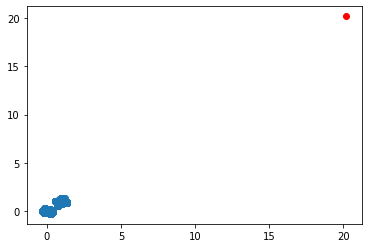

In [3]:
plt.scatter(data['xcoordinate'], data['ycoordinate'])
plt.scatter(20.19,20.19, c = 'red')

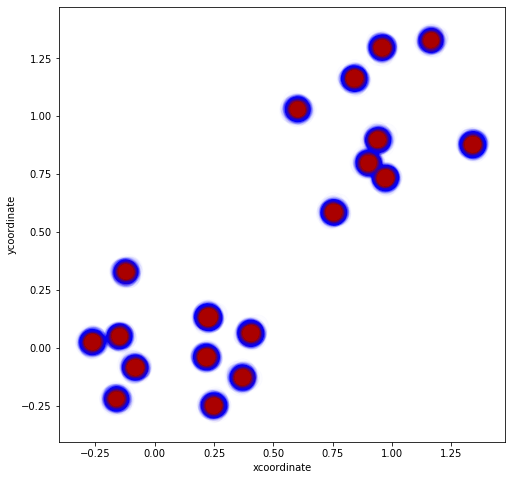

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
low = data[data['power_level']<3]
high = data[data['power_level']>2]
high.plot(x = 'xcoordinate', y = 'ycoordinate', kind = 'scatter', ax=ax, c = "blue", alpha = 0.01, s = 100*high['power_level'])
low.plot(x = 'xcoordinate', y = 'ycoordinate', kind = 'scatter', ax=ax, c = "red", alpha = 0.01, s = 100*low['power_level']+10)

In [25]:
data['power_level'].value_counts()

0    4388
5    4343
4    4284
1    4248
2    4245
3    4160
Name: power_level, dtype: int64

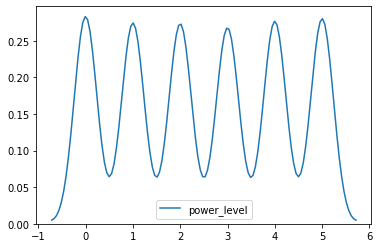

In [6]:
sns.kdeplot(data['power_level'])

In [7]:
data['miles'] = data.apply(
    (lambda x: vincenty((x['xcoordinate'], x['ycoordinate']), (20.19,20.19), miles = True)), axis=1)

data.head()

,scooter_id,xcoordinate,ycoordinate,power_level,miles
0,0,0.906835,0.776484,0,1865.830584
1,1,0.928587,0.804964,2,1863.390811
2,2,0.904091,0.784043,1,1865.607705
3,3,0.906752,0.804461,0,1864.503721
4,4,0.900641,0.781683,4,1865.892041


In [8]:
closest = data['miles'].min()
print(closest)

1824.471168


In [9]:
data['miles'] = data['miles']- closest

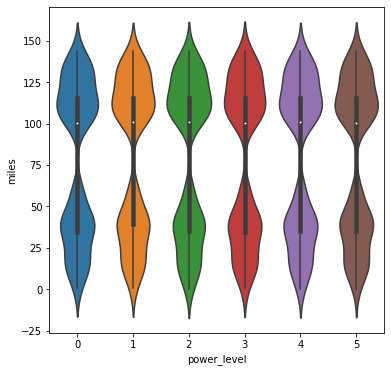

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.violinplot(x = 'power_level', y = 'miles', data = data, ax =ax)

In [11]:
need_charge = data[data['power_level']!=5]
need_charge.sort_values(by=['miles'])
need_charge['miles'].mean()

78.33991392403306

In [12]:
city1 = need_charge[need_charge['miles']<78]
city2 = need_charge[need_charge['miles']>=78]

In [13]:
city1.sort_values(by=['miles'], inplace=True)
city1.head()

/Users/muskanuprety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,scooter_id,xcoordinate,ycoordinate,power_level,miles
3027,3027,1.188913,1.351323,2,0.000000
2809,2809,1.196355,1.339839,4,0.168543
3059,3059,1.184466,1.347022,2,0.426304
2703,2703,1.188549,1.339713,4,0.566371
3451,3451,1.174677,1.354255,4,0.576622


In [14]:
city1['time_scooter_spent_inside_bus'] = 0
city1['stops_travelled'] = 0
city1 = city1.reset_index()

city1.head()


/Users/muskanuprety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/muskanuprety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,scooter_id,xcoordinate,ycoordinate,power_level,miles,time_scooter_spent_inside_bus,stops_travelled
0,3027,3027,1.188913,1.351323,2,0.000000,0,0
1,2809,2809,1.196355,1.339839,4,0.168543,0,0
2,3059,3059,1.184466,1.347022,2,0.426304,0,0
3,2703,2703,1.188549,1.339713,4,0.566371,0,0
4,3451,3451,1.174677,1.354255,4,0.576622,0,0


In [15]:
city2.sort_values(by=['miles'], inplace= True)
city2.head()   

/Users/muskanuprety/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,scooter_id,xcoordinate,ycoordinate,power_level,miles
7357,7357,0.431270,0.079461,0,98.279050
7708,7708,0.421455,0.089197,1,98.299627
8728,8728,0.421173,0.088796,2,98.332808
7302,7302,0.433002,0.074584,2,98.426799
7689,7689,0.414685,0.092342,2,98.484934


In [16]:
#9907
city1['power_level'].value_counts()

0    2094
4    1979
3    1963
1    1953
2    1918
Name: power_level, dtype: int64

In [17]:
#11418
city2['power_level'].value_counts()


2    2327
4    2305
1    2295
0    2294
3    2197
Name: power_level, dtype: int64

In [18]:
def create_dict(df):
    tracker={}
    for i in range(len(df.index)-1): 
        m=i
        n=i+1
        record = str(df.iloc[m, 2]) + "," + str(df.iloc[m, 3]) + "-" + str(df.iloc[n, 2]) + "," + str(df.iloc[n, 3])
        next_scooter_coord = (df.iloc[n, 2], df.iloc[n, 3])
        miles_travelled = vincenty((df.iloc[m, 2], df.iloc[m, 3]), next_scooter_coord, miles = True)
        time = miles_travelled/50
        tracker[record] = time
        n = n+1
    return tracker

In [20]:
def charge_scooter(df):
    extra_time=0
    tracker = create_dict(df)
    for index, row in df.iterrows():
        i = index
        n = index+1
        extra_time_for_scooter = 0
        while (df.iloc[index, 4]+df.iloc[index, 6]) < 5:
            if n < len(df.index):
                next_scooter_coord = (df.iloc[n, 2], df.iloc[n, 3])
                record = str(df.iloc[i, 2]) + "," + str(df.iloc[i, 3]) + "-" + str(df.iloc[n, 2]) + "," + str(df.iloc[n, 3])
                df.iloc[index,6] = df.iloc[index,6] + tracker[record]
                df.iloc[index,7] = df.iloc[index,7] + 1
            else:
                extra_time_for_scooter = extra_time_for_scooter + 0.5
                df.iloc[index,6] = df.iloc[index,6] + 0.5
                
            if extra_time_for_scooter > extra_time:
                extra_time = extra_time_for_scooter
                
            i=i+1
            n=n+1
    print(extra_time)
charge_scooter(city1)
    

5.0


In [21]:
city1.tail()

,index,scooter_id,xcoordinate,ycoordinate,power_level,miles,time_scooter_spent_inside_bus,stops_travelled
9902,6570,6570,0.723786,0.580321,3,59.821441,2.082297,4
9903,6846,6846,0.744222,0.558660,1,59.835614,4.041231,3
9904,6876,6876,0.736077,0.566595,1,59.862999,4.025553,2
9905,6612,6612,0.735492,0.564416,0,59.995947,5.022434,1
9906,6889,6889,0.724005,0.575940,1,60.019157,4.000000,0


In [32]:
total_time = 1824.471168/50
tracker = create_dict(city1)
for key, value in tracker.items():
    total_time = total_time + value
total_time = total_time + 5
print("total time taken to charge all scooters : "+ str(total_time) + " hours")

total time taken to charge all scooters : 1013.8477481600027 hours
